`In this notebook we check the metrices and relationships btw features also after doing all the statistical analysis we build the appropriate model for carecost analysis`

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### we divide the x and y 
# x - for the features 
# y - for the target feature

df = pd.read_csv(r"D:\ML Projects\CareCost Analytics\insurance.csv")

x = df.drop("charges" , axis=1)
y = df["charges"]

In [3]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [4]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

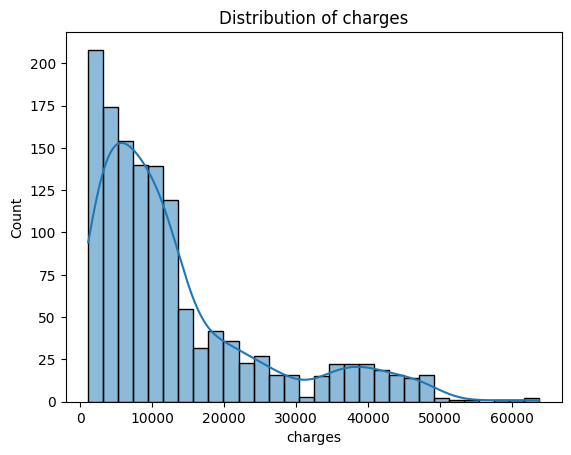

skewness :  1.5158796580240388


In [8]:
sns.histplot(
  y , 
  kde=True
)
plt.title("Distribution of charges")
plt.show()
print("skewness : ", y.skew())

In [10]:
## although the skewness is greater than 1 so it is rightly skewed data so we apply log transformation 

y = np.log1p(y)

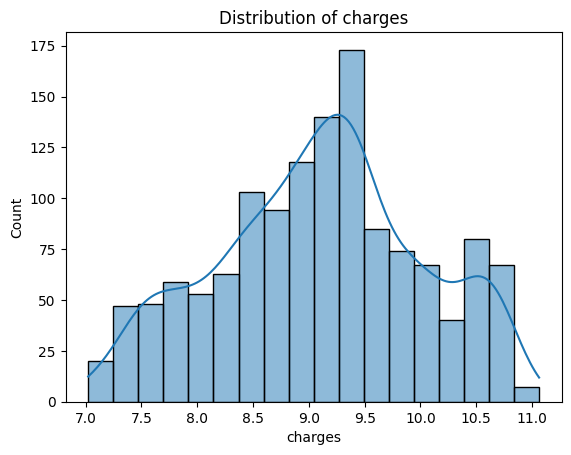

skewness :  -0.08981728740026824


In [11]:
sns.histplot(
  y , 
  kde=True
)
plt.title("Distribution of charges")
plt.show()
print("skewness : ", y.skew())

In [12]:
X = pd.get_dummies(x, drop_first=True)

In [13]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


## now doing the exact work to check the inference of the dataset 

In [19]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
X_train_sm = pd.get_dummies(X_train, drop_first=True)
X_train_sm = X_train_sm.astype(float)
X_train_sm = sm.add_constant(X_train_sm)

In [31]:
X_train_sm

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,1.0,46.0,19.950,2.0,0.0,0.0,1.0,0.0,0.0
1285,1.0,47.0,24.320,0.0,0.0,0.0,0.0,0.0,0.0
1142,1.0,52.0,24.860,0.0,0.0,0.0,0.0,1.0,0.0
969,1.0,39.0,34.320,5.0,0.0,0.0,0.0,1.0,0.0
486,1.0,54.0,21.470,3.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,1.0,18.0,31.350,4.0,0.0,0.0,0.0,0.0,0.0
1130,1.0,39.0,23.870,5.0,0.0,0.0,0.0,1.0,0.0
1294,1.0,58.0,25.175,0.0,1.0,0.0,0.0,0.0,0.0
860,1.0,37.0,47.600,2.0,0.0,1.0,0.0,0.0,1.0


In [32]:
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     413.7
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          7.52e-320
Time:                        15:30:30   Log-Likelihood:                -661.17
No. Observations:                1070   AIC:                             1340.
Df Residuals:                    1061   BIC:                             1385.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0468      0.082  

### FInal conclusion Linear model is valid for this dataset